Epoch 0, Cost: 1.3538
Epoch 100, Cost: 0.8121
Epoch 200, Cost: 0.8194
Epoch 300, Cost: 0.8107
Epoch 400, Cost: 0.8072
Epoch 500, Cost: 0.8075
Epoch 600, Cost: 0.8066
Epoch 700, Cost: 0.8127
Epoch 800, Cost: 0.8271
Epoch 900, Cost: 0.8068

Learned parameters (mini-batch GD):
Intercept: 4.2430
Slope: 2.8040


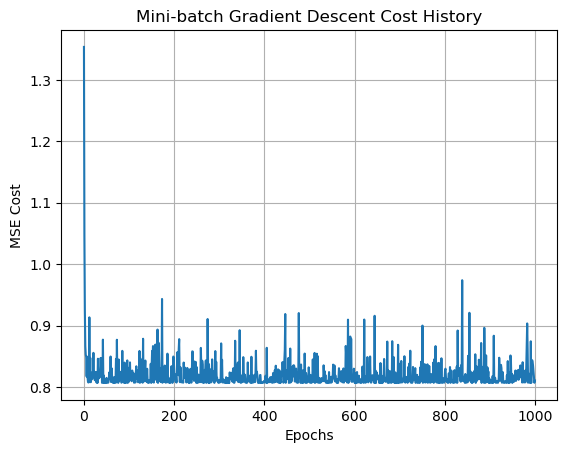

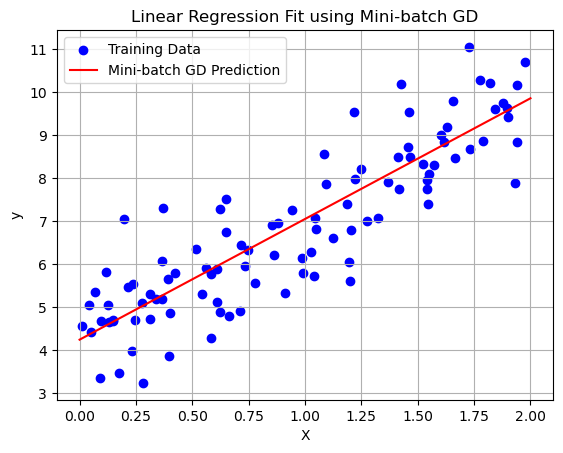

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)

def mini_batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000, batch_size=10):
    m = len(X)
    theta = np.random.randn(2, 1)  # Initialize weights (bias + slope)
    
    # Add bias term (x0 = 1)
    X_bias = np.c_[np.ones((m, 1)), X]  # Shape: (m, 2)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle data every epoch
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        # Loop over mini-batches
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute gradient for current mini-batch
            gradients = 2 / len(X_batch) * X_batch.T.dot(X_batch.dot(theta) - y_batch)

            # Update parameters
            theta -= learning_rate * gradients

        # Compute cost for this epoch (MSE)
        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return theta, cost_history

# Train the model with mini-batch size 10
theta_final, cost_history = mini_batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000, batch_size=10)

# Print learned parameters
print("\nLearned parameters (mini-batch GD):")
print(f"Intercept: {theta_final[0][0]:.4f}")
print(f"Slope: {theta_final[1][0]:.4f}")

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('MSE Cost')
plt.title('Mini-batch Gradient Descent Cost History')
plt.grid(True)
plt.show()

# Plot the regression line with the data points
X_new = np.array([[0], [2]])
X_new_bias = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_bias.dot(theta_final)

plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_new, y_predict, color='red', label='Mini-batch GD Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit using Mini-batch GD')
plt.grid(True)
plt.show()
